In [68]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [69]:
import tensorflow as tf
from tensorflow import keras

In [38]:
keras.__version__

'2.5.0'

In [39]:
tf.__version__

'2.5.0-rc0'

In [70]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

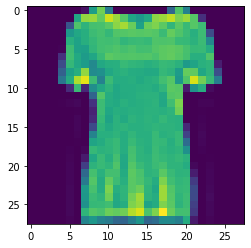

In [71]:
plt.imshow(X_train_full[10])

In [42]:
y_train_full[10]

0

In [43]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

In [72]:
class_names[y_train_full[10]]

'T-shirt/top'

In [45]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [46]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

In [78]:
X_valid, X_train = X_train_n[0:5000], X_train_n[5000:], 
y_vaild, y_train = y_train_full[0:5000], y_train_full[5000:],
X_test = X_test_n

In [48]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [79]:
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


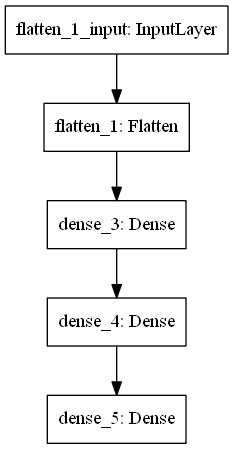

In [52]:
import pydot
keras.utils.plot_model(model)

In [53]:
weights, biases = model.layers[1].get_weights()

In [54]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [55]:
weights.shape

(784, 300)

In [56]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
biases.shape

(300,)

In [85]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [86]:
model.history = model.fit(X_train,y_train,epochs=30, validation_data = (X_valid,y_vaild))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4485 - accuracy: 0.8422 - val_loss: 0.5330 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4210 - accuracy: 0.8534 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4060 - accuracy: 0.8579 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3756 - accuracy: 0.8671 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3627 - val_accuracy:

In [89]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [92]:
model.history.history

{'loss': [0.7236780524253845,
  0.4843233525753021,
  0.43925395607948303,
  0.41249433159828186,
  0.39395850896835327,
  0.37522026896476746,
  0.36334460973739624,
  0.35189977288246155,
  0.3415890038013458,
  0.33219200372695923,
  0.32431620359420776,
  0.31506234407424927,
  0.30816128849983215,
  0.3023137152194977,
  0.29484379291534424,
  0.289277583360672,
  0.2841065526008606,
  0.277920126914978,
  0.27297961711883545,
  0.26764771342277527,
  0.26259559392929077,
  0.2577607333660126,
  0.253675252199173,
  0.24865274131298065,
  0.24440625309944153,
  0.24075055122375488,
  0.23647968471050262,
  0.23291146755218506,
  0.22853097319602966,
  0.22528870403766632],
 'accuracy': [0.7644181847572327,
  0.8317636251449585,
  0.8453817963600159,
  0.8568727374076843,
  0.8618909120559692,
  0.8673818111419678,
  0.871399998664856,
  0.875,
  0.8785272836685181,
  0.8825091123580933,
  0.8830181956291199,
  0.8867999911308289,
  0.889018177986145,
  0.8916181921958923,
  0.8939

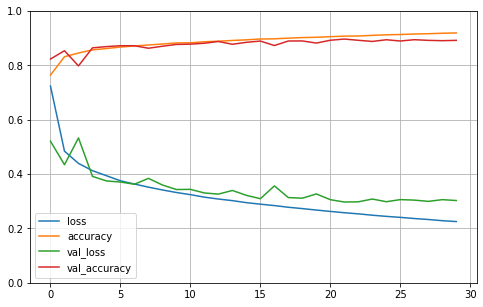

In [93]:
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [94]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8834


[0.3360535800457001, 0.883400022983551]

In [95]:
X_new=X_test[:3]

In [96]:
y_proba=model.predict(X_new)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.012, 0.   , 0.032, 0.001,
        0.956],
       [0.   , 0.   , 0.988, 0.   , 0.011, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [98]:
y_pred=model.predict_classes(X_new)
y_pred

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [100]:
np.array(class_names)[y_pred]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


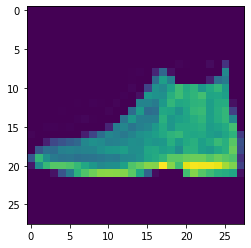

In [102]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


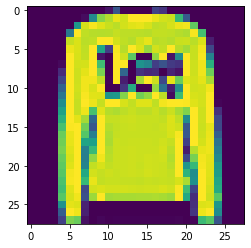

In [103]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


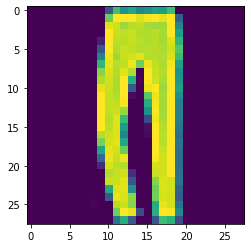

In [104]:
print(plt.imshow(X_test[2]))